# Analýza filmových hodnocení

Data používaná v analýze si můžete stáhnout do složky data z tohoto odkazu:
https://grouplens.org/datasets/movielens/latest/

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Načteme data
df_movies_source = pd.read_csv("data/movies.csv")
display(df_movies_source)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [18]:
# Počet nových filmů v jednotlivých letech
df_movies = df_movies_source.copy()
df_movies["year"] = df_movies["title"].str.extract('\(([0-9]{4})\)')
df_movies = df_movies[ df_movies["year"].notna() ]

df_movies.info()
df_movies["year"] = df_movies["year"].astype(int)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85919 entries, 0 to 86536
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  85919 non-null  int64 
 1   title    85919 non-null  object
 2   genres   85919 non-null  object
 3   year     85919 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 85919 entries, 0 to 86536
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  85919 non-null  int64 
 1   title    85919 non-null  object
 2   genres   85919 non-null  object
 3   year     85919 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


<Axes: xlabel='year'>

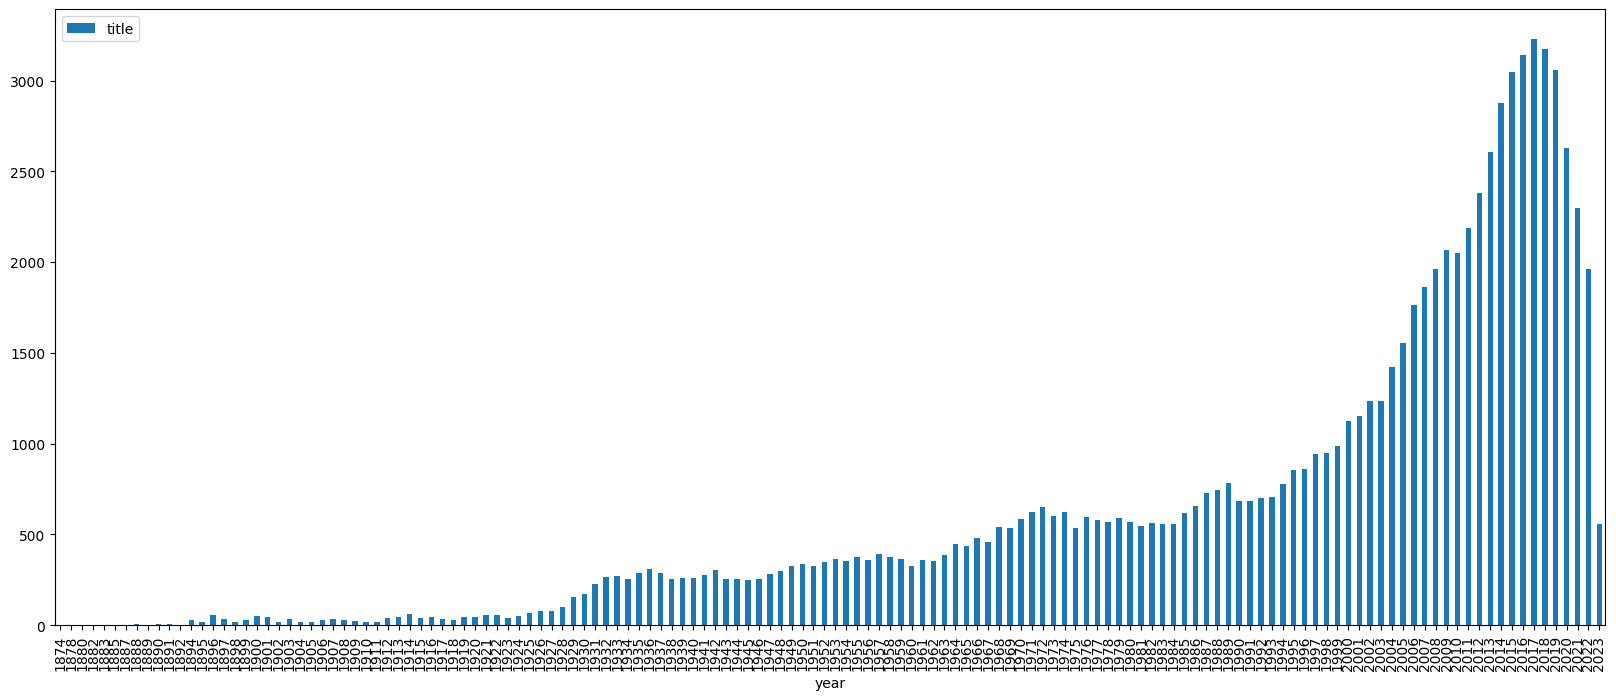

In [25]:
#kolik bylo zveřejněno filmů v jednotlivých letech?

df_movies.groupby("year").agg({"title":"count"}).plot.bar(figsize=(20,8))

In [58]:
df_movies.groupby("year").agg({"title":"count"}).tail(25)

,title
year,
1999,985
2000,1125
2001,1155
2002,1233
2003,1235
2004,1425
2005,1554
2006,1765
2007,1864


In [26]:
# Jak uživatelé hodnotí?

df_ratings = pd.read_csv("data/ratings.csv")

In [31]:
users = len(df_ratings["userId"].unique())
ratings = len(df_ratings)
print("Users:",users)
print("Ratings:",ratings)
print("Average number of ratings per user: ", ratings/users)

Users: 330975
Ratings: 33832162
Average number of ratings per user:  102.21969030893572


rating
1          8578
2          5643
3          4997
4          4344
5          8689
6          6588
7          5094
8          3982
9          3432
10         7657
11         5203
12         4417
13         3913
14         4137
15        20147
16        10801
17         7609
18         6154
19         5147
20         5515
21         4108
22         3795
23         3524
24         3217
25         3306
Name: count, dtype: int64


<Axes: xlabel='rating'>

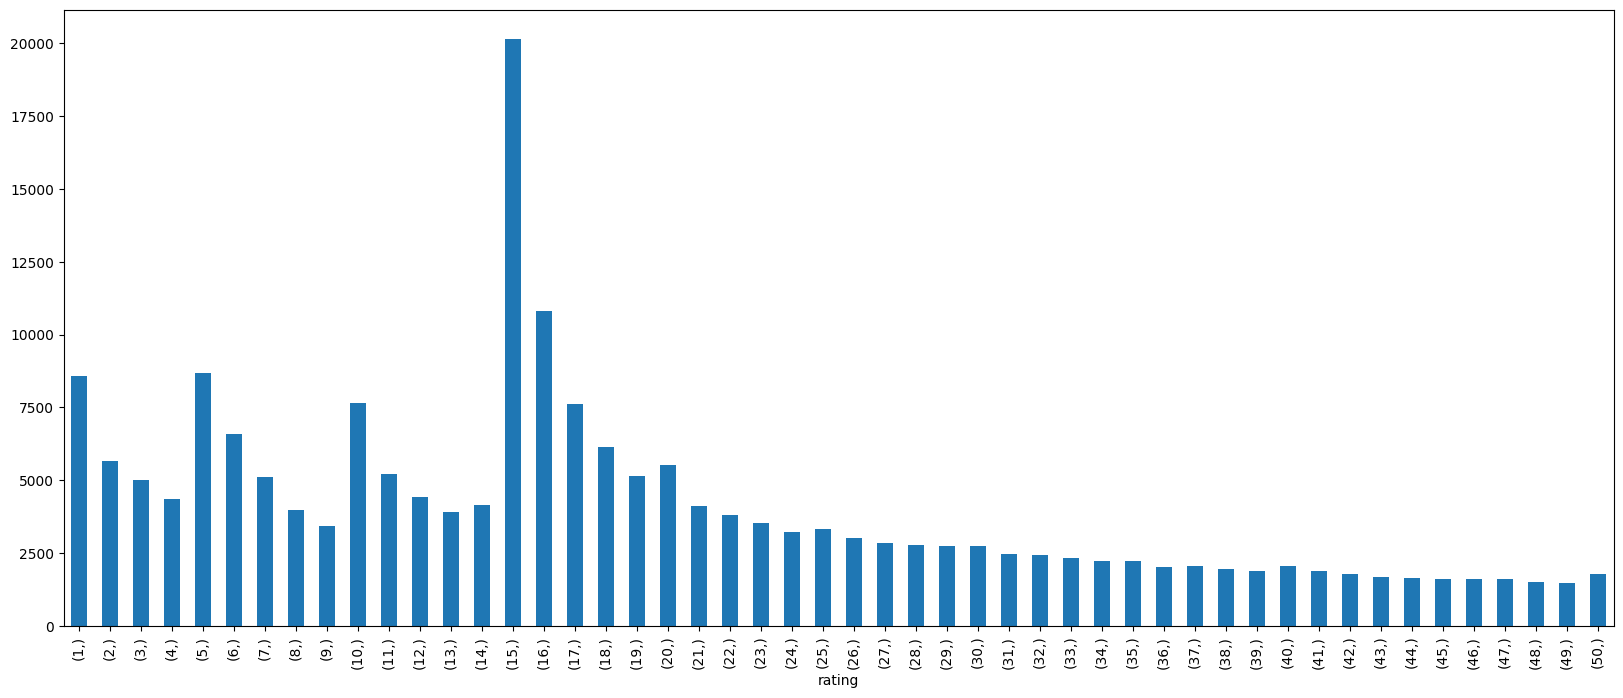

In [42]:
ratings2 = pd.DataFrame(df_ratings.groupby("userId").agg({"rating":"count"})["rating"])
print(ratings2.value_counts(sort=False).head(25))
ratings2.value_counts(sort=False).head(50).plot.bar(figsize=(20,8))

In [45]:
# Nejlépe hodnocené filmy.
# - Nejlepší průměrné hodnocení
# - Alespoň 100 hodnocení

df_rating_by_movie = df_ratings.groupby("movieId").agg({"rating":["mean","count"]})
df_rating_by_movie.columns = df_rating_by_movie.columns.get_level_values(1)
df_rating_by_movie = df_rating_by_movie.rename(columns={"mean":"rating_avg", "count":"rating_count"})
display(df_rating_by_movie)

,rating_avg,rating_count
movieId,,
1,3.893508,76813
2,3.278179,30209
3,3.171271,15820
4,2.868395,3028
5,3.076957,15801
...,...,...
288967,3.500000,1
288971,0.500000,1
288975,4.000000,1


In [46]:
df_movies2 = pd.merge(df_rating_by_movie, df_movies, on="movieId", how="inner")
display(df_movies2)

,movieId,rating_avg,rating_count,title,genres,year
0,1,3.893508,76813,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,3.278179,30209,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,3.171271,15820,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,2.868395,3028,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,3.076957,15801,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...
82657,288967,3.500000,1,State of Siege: Temple Attack (2021),Action|Drama,2021
82658,288971,0.500000,1,Ouija Japan (2021),Action|Horror,2021
82659,288975,4.000000,1,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
82660,288977,3.000000,1,Skinford: Death Sentence (2023),Crime|Thriller,2023


In [51]:
display(df_movies2[ df_movies2["rating_count"]>=100 ].sort_values("rating_count", ascending=False).head(10))

,movieId,rating_avg,rating_count,title,genres,year
314,318,4.416792,122296,"Shawshank Redemption, The (1994)",Crime|Drama,1994
351,356,4.068189,113581,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
292,296,4.191778,108756,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
2480,2571,4.160631,107056,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
585,593,4.150287,101802,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991
257,260,4.092400,97202,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977
2867,2959,4.236019,86207,Fight Club (1999),Action|Crime|Drama|Thriller,1999
522,527,4.242337,84232,Schindler's List (1993),Drama|War,1993
475,480,3.689013,83026,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993
1166,1196,4.118030,80200,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,1980


In [53]:
# Vytvoříme odkazy na IMDB

df_links = pd.read_csv("data/links.csv")
display(df_links)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
86532,288967,14418234,845861.0
86533,288971,11162178,878958.0
86534,288975,70199,150392.0
86535,288977,23050520,1102551.0


In [54]:
df_movies3 = pd.merge(df_links, df_movies2, on="movieId", how="inner")
display(df_movies3)

,movieId,imdbId,tmdbId,rating_avg,rating_count,title,genres,year
0,1,114709,862.0,3.893508,76813,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,113497,8844.0,3.278179,30209,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,113228,15602.0,3.171271,15820,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,114885,31357.0,2.868395,3028,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,113041,11862.0,3.076957,15801,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...,...,...
82657,288967,14418234,845861.0,3.500000,1,State of Siege: Temple Attack (2021),Action|Drama,2021
82658,288971,11162178,878958.0,0.500000,1,Ouija Japan (2021),Action|Horror,2021
82659,288975,70199,150392.0,4.000000,1,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
82660,288977,23050520,1102551.0,3.000000,1,Skinford: Death Sentence (2023),Crime|Thriller,2023


In [56]:
# Vytvoříme si odkazy na filmy v databázi IMDB.com
df_movies3["imdbLink"] = df_movies3.apply(lambda x: "https://www.imdb.com/title/tt{:07d}/".format(x["imdbId"])  , axis=1)
print(df_movies3)

       movieId    imdbId     tmdbId  rating_avg  rating_count  \
0            1    114709      862.0    3.893508         76813   
1            2    113497     8844.0    3.278179         30209   
2            3    113228    15602.0    3.171271         15820   
3            4    114885    31357.0    2.868395          3028   
4            5    113041    11862.0    3.076957         15801   
...        ...       ...        ...         ...           ...   
82657   288967  14418234   845861.0    3.500000             1   
82658   288971  11162178   878958.0    0.500000             1   
82659   288975     70199   150392.0    4.000000             1   
82660   288977  23050520  1102551.0    3.000000             1   
82661   288983  11644948   940588.0    3.000000             1   

                                                   title  \
0                                       Toy Story (1995)   
1                                         Jumanji (1995)   
2                                Grumpi